# Exploração de dados

### Importando bibliotecas

In [18]:
import pandas as pd

In [19]:
#Para que os plot também sejam pretos porque meu visual é dark
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

### Download dos dados

In [20]:
## é possivel ler o csv de uma URL e/ou de um arquivo local 
## para ler um arquivo local, trocar a string da URL por uma string do caminho local do arquivo
url = 'https://raw.githubusercontent.com/dailys-maite-data-scientist/Imersao_dados_Alura4/main/dados.csv'
dados = pd.read_csv(url)
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\r\n /Mês


In [21]:
#Explorar dados de maneira inicial
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [22]:
#Amostra aleatoria dos dados con n exemplos
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5372,"Rua Francisco Pais, 316",Jardim Ipanema (Zona Sul),São Paulo,350,2,1,2,R$ 690.000
3579,Rua Maestro Chiaffarelli,Jardim Paulista,São Paulo,196,3,2,1,R$ 2.600.000
9651,NaN,Jardim Tremembe,São Paulo,155,3,3,2,R$ 825.000
7429,NaN,Jardim da Glória,São Paulo,755,6,9,6,R$ 2.880.000
3867,"Rua Aiarani, 24",Tatuapé,São Paulo,80,2,2,1,R$ 380.000
549,NaN,Jardim Santo Elias,São Paulo,250,3,3,2,R$ 700.000
4728,Rua Banabuiú,Vila Comercial,São Paulo,205,3,3,6,R$ 950.000
1791,NaN,Alto de Pinheiros,São Paulo,387,5,8,5,R$ 5.500.000
9530,Rua Melo Morais Filho,Jardim Guedala,São Paulo,545,4,5,6,R$ 8.500.000
5000,Rua Xerentes,Pompeia,São Paulo,160,3,1,1,R$ 1.590.000


In [23]:
#Informação da BD
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [24]:
#Pegar um bairro específico
dados["Bairro"]
dados["Bairro"][6522]

'Vila Paulo Silas'

In [25]:
#Princiapis estatísticas de "Metragem"
dados['Metragem'].mean(), dados['Metragem'].median(), dados['Metragem'].min(), dados['Metragem'].max()

(442.30065947242207, 290.0, 10, 750000)

### Quais são os 10 bairros com maior número de imoveis?

<AxesSubplot:>

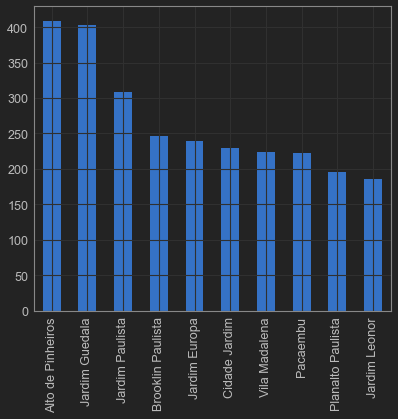

In [26]:
n_imoveis_bairro = dados ["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

### Qual é a media de metragem do bairro "Vila Mariana"?

In [27]:
#Primero precisamos saber se tem imoveis nesse bairro
sum((dados['Bairro'] == 'Vila Mariana')*1)

184

In [28]:
imoveis_VM = (dados['Bairro'] == 'Vila Mariana')
imoveis_VM

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [29]:
imoveis_vila_mariana = dados[imoveis_VM]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [30]:
#Cálculo da média
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913